In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fandango_before = pd.read_csv('fandango_score_comparison.csv') #be more descriptive and concise with variable names, maybe fandango_before and fandango_after
fandango_after= pd.read_csv('movie_ratings_16_17.csv')

ABOUT PROJECT

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and
found strong evidence to suggest that Fandango's rating system was biased and dishonest
( Fandango is an online movie ratings aggregator). He published his analysis in this article
— a great piece of data journalism that's totally worth reading.
Fandango displays a 5-star rating system on their website, where the minimum rating is 0
stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed
to users and the actual rating, which he was able to find in the HTML of the page. He was
able to find that:
- The actual rating was almost always rounded up to the nearest half-star. For
instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may
expect.
-  In the case of 8% of the ratings analyzed, the rounding up was done to the nearest
whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in
the HTML of the page to a displayed rating of 5 stars.



OUR AIM      

The aim of this poject is to analyze movie rating before and after the Hickey's analysis to see if there have been any change in Fandango rating system, after hickey's analysis,  the link to the dataset are https://github.com/fivethirtyeight/data/tree/master/fandango and https://github.com/mircealex/Movie_ratings_2016_17

In [ ]:
fandango_before.head()
#reading the entire dataset like this isn't always best practise, what if you have more rows and columns. read head/tail, get summary, describe instead.

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


<b>"Examining the data, we see that they are not random and do not present the population we need"</b>
<p style=color:red;font-weight:bold>please explain the statement above.</p>

That is because films under 30 fans votes are not included and also films not released in 2015 

In [ ]:
fandango_after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [ ]:
fandango_before.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [ ]:
fandago_before=fandango_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
'Fandango_votes', 'Fandango_Difference']].copy()
fandago_after=fandango_after[['movie', 'year',
'fandango']].copy()

In [ ]:
fandango_before.loc[fandango_before.Fandango_votes>=30]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [ ]:
fandango_after.shape

(214, 15)

In [ ]:
fandango_after.sample(10,random_state=1)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
108,Mechanic: Resurrection,2016,38,5.6,29,41,4.0,1.90,2.80,1.45,2.05,2.0,3.0,1.5,2.0
206,Warcraft,2016,32,7.0,28,71,4.0,1.60,3.50,1.40,3.55,1.5,3.5,1.5,3.5
106,Max Steel,2016,22,4.6,0,38,3.5,1.10,2.30,0.00,1.90,1.0,2.5,0.0,2.0
107,Me Before You,2016,51,7.4,58,73,4.5,2.55,3.70,2.90,3.65,2.5,3.5,3.0,3.5
51,Fantastic Beasts and Where to Find Them,2016,66,7.5,73,81,4.5,3.30,3.75,3.65,4.05,3.5,4.0,3.5,4.0
33,Cell,2016,38,4.3,11,16,3.0,1.90,2.15,0.55,0.80,2.0,2.0,0.5,1.0
59,Genius,2016,56,6.5,51,45,3.5,2.80,3.25,2.55,2.25,3.0,3.0,2.5,2.0
152,Sully,2016,74,7.5,85,85,4.5,3.70,3.75,4.25,4.25,3.5,4.0,4.0,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
31,Captain America: Civil War,2016,75,7.9,90,89,4.5,3.75,3.95,4.50,4.45,4.0,4.0,4.5,4.5


In [ ]:
fandango_before.shape

(146, 22)

In [ ]:
sum(fandango_before['Fandango_votes']<30)  

0

<p style="color:red"><b>---- COMMENT ----</b></p>
THE next instruction here is:<br>
Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

For the data set with `ratings previous` to Hickey's analysis, select the following columns: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'.


For the `other data set`, select the the following columns: 'movie', 'year', 'fandango'.

Another way to achieve this is: 

previous_analysis = analysis[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
                             
this will help you copy selected columns into a new df named previous_analysis or whatever you choose to call it.

this is the same for the other dataset.

after_hickey_analysis =  rating[['movie''year','fandango']].copy()

creating a new list with the important columns we need to work with

In [ ]:
fandango_after

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


Exploring the new dataset

Now we need movies that came out after the analysis was done in 2015. So we will select movies from the next year,2016 and put them in a new dataset

In [ ]:
rating2016=fandango_after.loc[fandango_after.year ==2016].copy()
#this code selects only 2016 movies

In [ ]:
rating2016['year'].value_counts()


2016    191
Name: year, dtype: int64

Here we need to select films from 2015 although, there is no year column, but we can extract it from the film column 

● The population of interest changes to films released in 2015 and 2016 only
● The new goal is still a fairly good proxy for our initial goal, which was to determine
whether there has been any change in Fandango's rating system after Hickey's
analysis

In [ ]:
Year=fandango_before['FILM'].str[-5:-1]
#this code gets the the range from last second to the fifth to last charater from the FILM column 

In [ ]:
df=pd.DataFrame(fandango_before)
df['Year']= Year
df


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,2015
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5,2015
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5,2015
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5,2015
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5,2014
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5,2015
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5,2015


we add this new column to the dataset but it forms as a string

In [ ]:
df['Year']=df['Year'].astype(int)
#this converts the string to an integal so we can do mathematical operations on it 

In [ ]:
rating_2015=df.loc[df.Year ==2015].copy() 
#Now we will isolate films that are from 2015  

In [ ]:
rating_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Text(0.5,1.07,'Difference in Fandango movie rating')

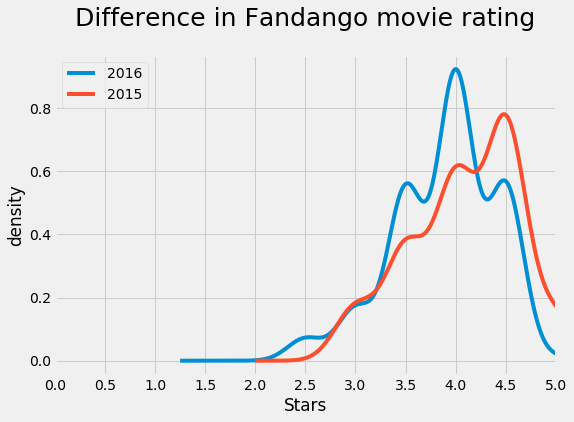

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
rating2016['fandango'].plot.kde( label=2016, legend=True)
rating_2015['Fandango_Stars'].plot.kde(label=2015, legend=True,figsize = (8,5.5))
plt.xlabel('Stars')
plt.ylabel('density')

plt.xticks(np.arange(0.0, 5.1, 0.5))
plt.xlim(0.0, 5.0)
plt.title('Difference in Fandango movie rating', fontsize=25, y=1.07)


KERNEL DENSITY PLOT

Analysing the kernel density plot(kde) for both distributions, we can answer a few questions
first we see the shape of the two plots are too diffeent. We also see that
both are skewed to the right, signifying high ratings but the 2015 ratings are a little higher than 2016

In [ ]:
rating2016['fandango'].value_counts(normalize=True,dropna=False).sort_index(ascending=False)

5.0    0.005236
4.5    0.246073
4.0    0.403141
3.5    0.240838
3.0    0.073298
2.5    0.031414
Name: fandango, dtype: float64

Generating frequency table, we have values that arent to obvious what they say, we convert it into pecentages 

In [ ]:
# rating2016['fandango'].value_counts(normalize=True).sort_index(ascending=False).mul(100).round(1).astype(str) + '%'

#convert to percentage using --comment bunmi---

rating2016['fandango'].value_counts(normalize = True).sort_index() * 100 

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [ ]:
# rating_2015['Fandango_Ratingvalue'].value_counts(normalize=True).sort_index(ascending=False).mul(100).round(1).astype(str) + '%
rating_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

compaing both,2016 had 24.6% movies on 4.5 rating and 40.3% of movies in 4.0 rating, while before the Hickey's analysis, 2015 movies 37.8% had 4.5 rating and 6% of movies had 5.0 rating. Not very clear to see the direction of change from this table

In [ ]:
rating2016['fandango'].mean()
 

3.887434554973822

In [ ]:
rating_2015['Fandango_Stars'].mean()

4.0852713178294575

there is a slight difference in the mean, showing slightly higher rating in 2016 after the analysis

In [ ]:
rating_2015['Fandango_Stars'].median()

4.0

In [ ]:
rating2016['fandango'].median()

4.0

In [ ]:
rating_2015['Fandango_Stars'].mode()

0    4.5
dtype: float64

In [ ]:
rating2016['fandango'].mode()

0    4.0
dtype: float64

BAR CHART
We generate a bar chat showing the mean, median and mode of the two distributions to have a clearer picture of the difference between Fandango movies ratings in the two year

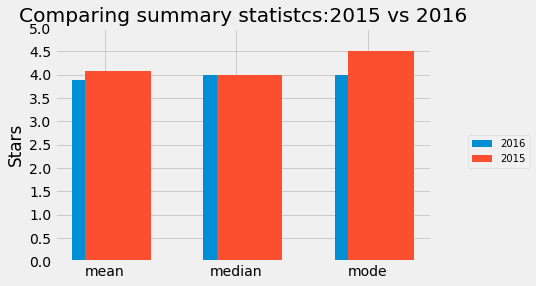

In [ ]:
x= np.arange(3)
stat= ['mean', 'median', 'mode']  
value_1=[3.887,4.0,4.0]
value_2 =[4.08,4.0,4.5]
plt.bar(x+0,value_1, width=.5, label=2016)
plt.bar(x+.10,value_2, width=.5, label=2015)
x_pos=[i for i, _ in enumerate(x)]
plt.yticks(np.arange(0.0, 5.5, 0.5))
plt.xticks(x, stat)
plt.ylabel('Stars')
plt.legend(fontsize= 10,loc= (1.1, 0.4))
plt.title('Comparing summary statistcs:2015 vs 2016')
plt.figure(figsize=(20,20))
plt.show()

CONCLUSION

Fandango is an online movie ratings aggregator. In October 2015, a data journalist named Walt Hickey analyzed movie ratings data Found out that movies were over rating on Fandango' website. Fandango replied that it was a bug in their rating system that over rated movies and were going to rectify it.

After the Hickeys analysis in 2015, we collected data from 2015 and 2016 movies rating from Fandango to see what had changed.
We were to clean the dataset and use Kernel Density plot and a bar chart algorithm to show the changes in the ratings before and after the analysis. We found out that rating were slightly lower in popular films in 2016. Signifying a little changed in thier rating system.